<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Visuals" data-toc-modified-id="Visuals-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visuals</a></span></li><li><span><a href="#Subset-of-random-instances" data-toc-modified-id="Subset-of-random-instances-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Subset of random instances</a></span></li><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preparing Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Nulls" data-toc-modified-id="Drop-Nulls-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Drop Nulls</a></span></li><li><span><a href="#Data-and-Label" data-toc-modified-id="Data-and-Label-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data and Label</a></span></li><li><span><a href="#Normalization:-StandardScaler" data-toc-modified-id="Normalization:-StandardScaler-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Normalization: StandardScaler</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#PCA-with-two-dimensions" data-toc-modified-id="PCA-with-two-dimensions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PCA with two dimensions</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>t-SNE</a></span><ul class="toc-item"><li><span><a href="#Compare-PCA-and-t-SNE" data-toc-modified-id="Compare-PCA-and-t-SNE-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Compare PCA and t-SNE</a></span></li></ul></li><li><span><a href="#Computing-random-projection" data-toc-modified-id="Computing-random-projection-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Computing random projection</a></span></li><li><span><a href="#Linear-Discriminant-Analysis" data-toc-modified-id="Linear-Discriminant-Analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Linear Discriminant Analysis</a></span></li><li><span><a href="#Isomap-projection" data-toc-modified-id="Isomap-projection-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Isomap projection</a></span></li><li><span><a href="#Locally-Linear-Embedding" data-toc-modified-id="Locally-Linear-Embedding-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Locally Linear Embedding</a></span><ul class="toc-item"><li><span><a href="#Standard" data-toc-modified-id="Standard-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Standard</a></span></li><li><span><a href="#Modified" data-toc-modified-id="Modified-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Modified</a></span></li></ul></li><li><span><a href="#MDS" data-toc-modified-id="MDS-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>MDS</a></span></li><li><span><a href="#Totally-Random-Trees-embedding" data-toc-modified-id="Totally-Random-Trees-embedding-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Totally Random Trees embedding</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

## Objective

Objective is to understand various models - t-SNE, Random projection, Linear Discriminant Analysis, Isomap, Locally Linear Embedding, MDS, and Totally Random Trees embedding. 

## Import Packages

In [64]:
### DataFrame ####
import numpy as np
import pandas as pd

### Visualization ####
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import offsetbox

### Scikit ####
from sklearn.model_selection import train_test_split
np.random.seed(42)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import (manifold, datasets, decomposition, ensemble, 
                     discriminant_analysis, random_projection, neighbors)

### Others ###
import time
import warnings
warnings.filterwarnings('ignore')
from time import time


## Get Data

In [ ]:
# for kaggle kernel
#train_set = pd.read_csv("../input/train.csv")
#test_set = pd.read_csv("../input/test.csv")

In [105]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [106]:
# Create a copy
train = train_set.copy()
test = test_set.copy()

## Visuals

In [132]:
# get columns
feat_cols = train.drop(columns=['label']).columns
len(feat_cols)

784

<Figure size 432x288 with 0 Axes>

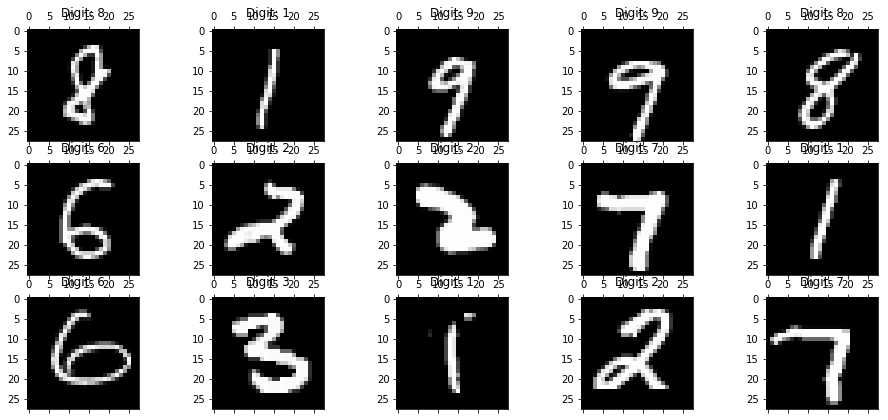

In [133]:
# Plot graph of each digit

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(train.loc[rndperm_train[i],'label'])) )
    ax.matshow(train.loc[rndperm_train[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## Subset of random instances

In [108]:
# For reproducability of the results
np.random.seed(42)
rndperm_train = np.random.permutation(train.shape[0])
rndperm_test = np.random.permutation(test.shape[0])

# Random instance of N
N = 10000
df_subset_train = train.loc[rndperm[:N],:].copy()
df_subset_test = test.loc[rndperm[:N],:].copy()

## Preparing Data

### Drop Nulls

In [109]:
# Check for nulls
df_subset_train['label'].isnull().sum()

3986

In [110]:
# drop nulls
df_subset_train = df_subset_train.dropna(how='any')

In [111]:
# recheck for nulls
df_subset_train['label'].isnull().sum()

0

In [112]:
# Subset shape
df_subset_train.shape

(6014, 785)

### Data and Label

In [122]:
# Normalising data by dividing it by 255 should improve activation functions performance
y_train = df_subset_train['label'].values
X_train = df_subset_train.drop(columns=['label']).values/255

In [123]:
X_train.shape

(6014, 784)

In [124]:
y_train.shape

(6014,)

In [127]:
# get columns
feat_cols = df_subset_train.drop(columns=['label']).columns
len(feat_cols)

784

### Normalization: StandardScaler

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

### PCA

In [135]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [136]:
# PCA features
features = range(pca.n_components_)
features

range(0, 784)

In [137]:
# number of intrinsic dimensions
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
d

265

In [138]:
# total variance of the intrinsic dimensions
np.sum(pca.explained_variance_ratio_)

1.0

In [139]:
# datasets after dimensionality reduction

pca = PCA(n_components=d)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
#X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
#print(X_test_reduced.shape)

(6014, 265)


In [140]:
df_subset_train['pca-one'] = X_train_reduced[:,0]
df_subset_train['pca-two'] = X_train_reduced[:,1] 

## PCA with two dimensions

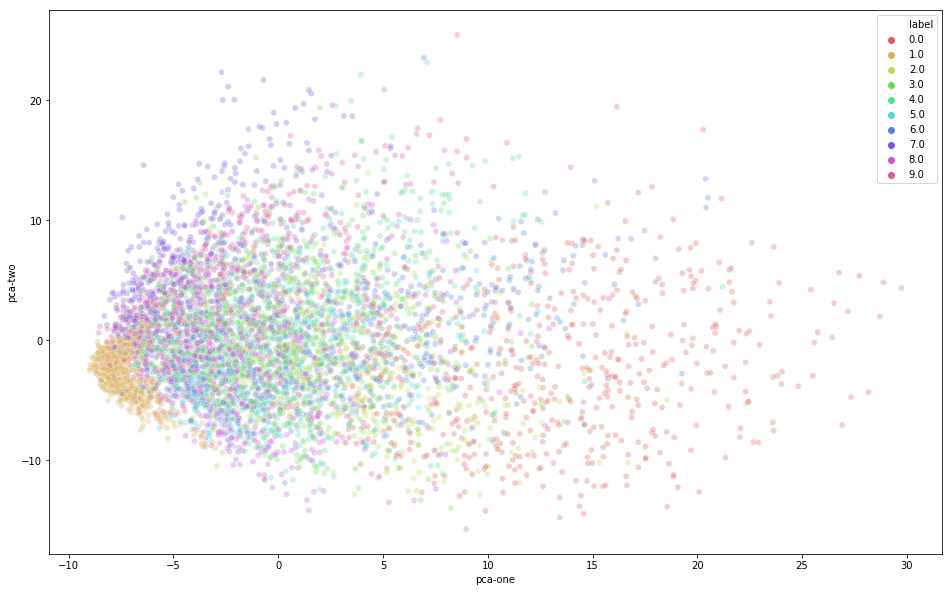

In [142]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

## t-SNE

In [145]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(X_train_reduced)

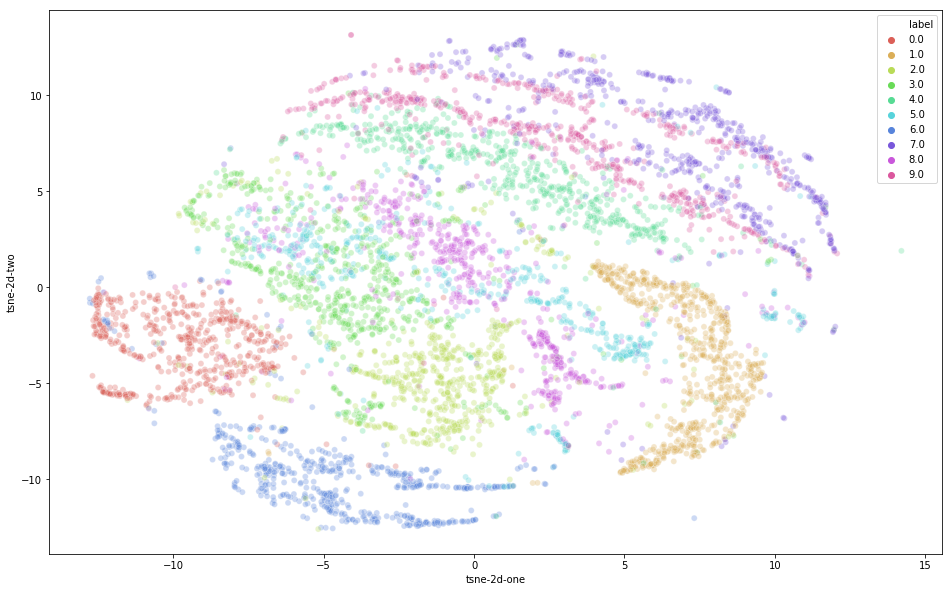

In [146]:
df_subset_train['tsne-2d-one'] = tsne_pca_results[:,0]
df_subset_train['tsne-2d-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

### Compare PCA and t-SNE

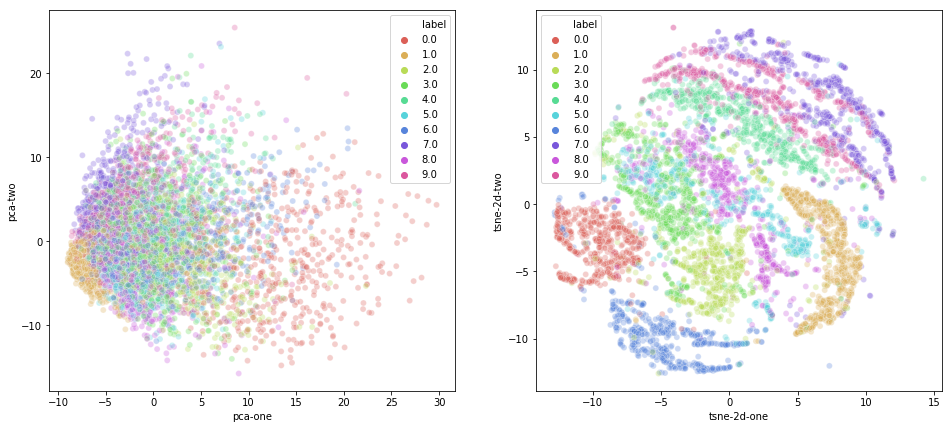

In [150]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3,
    ax=ax2
)

## Computing random projection

Computing random projection


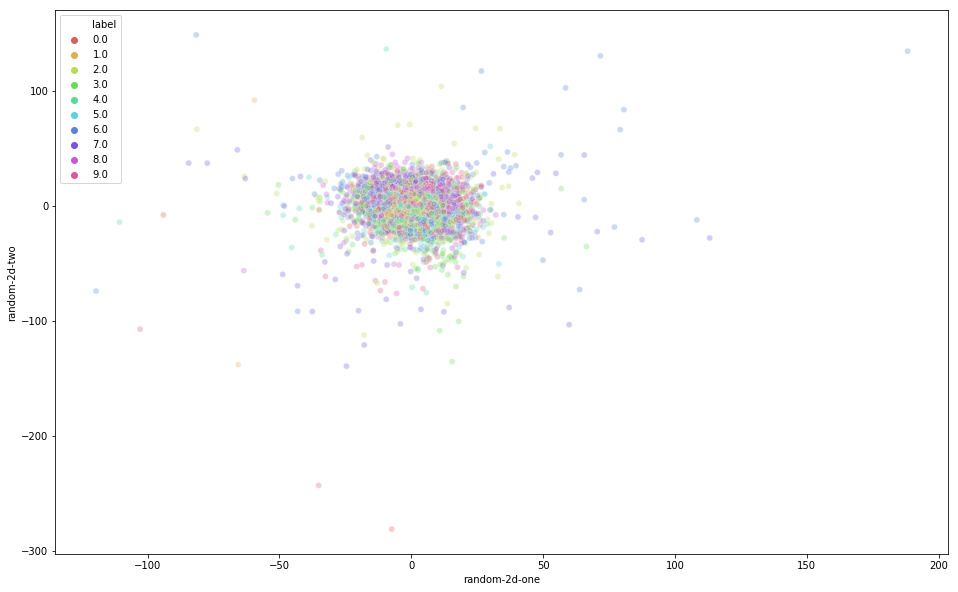

In [153]:
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X_train_reduced)

df_subset_train['random-2d-one'] = X_projected[:,0]
df_subset_train['random-2d-two'] = X_projected[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="random-2d-one", y="random-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)


## Linear Discriminant Analysis

In [154]:
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X_train_reduced.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible

X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)

Computing Linear Discriminant Analysis projection


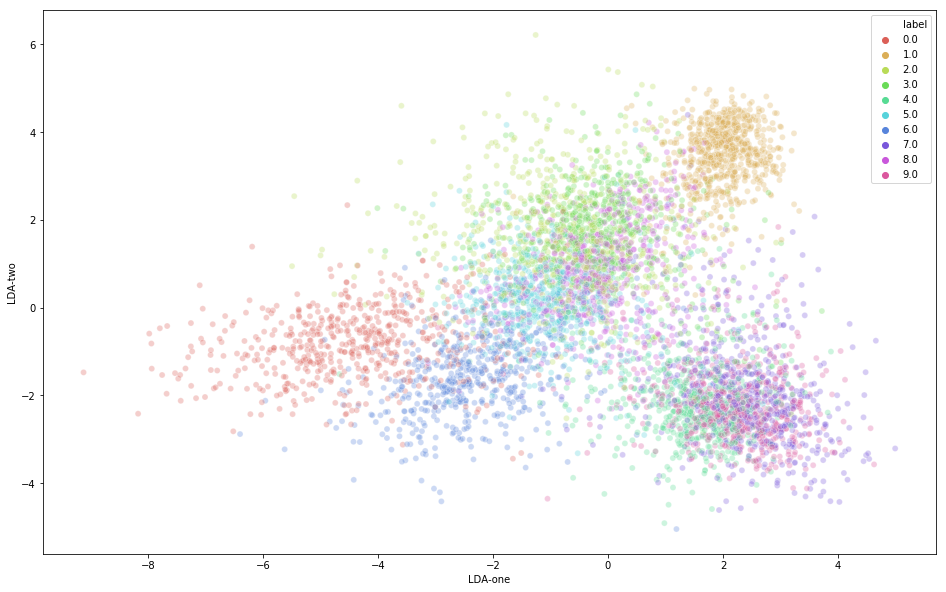

In [156]:
df_subset_train['LDA-one'] = X_lda[:,0]
df_subset_train['LDA-two'] = X_lda[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="LDA-one", y="LDA-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)


## Isomap projection

In [158]:
# Isomap projection of the digits dataset
print("Computing Isomap projection")

X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X_train_reduced)

Computing Isomap projection


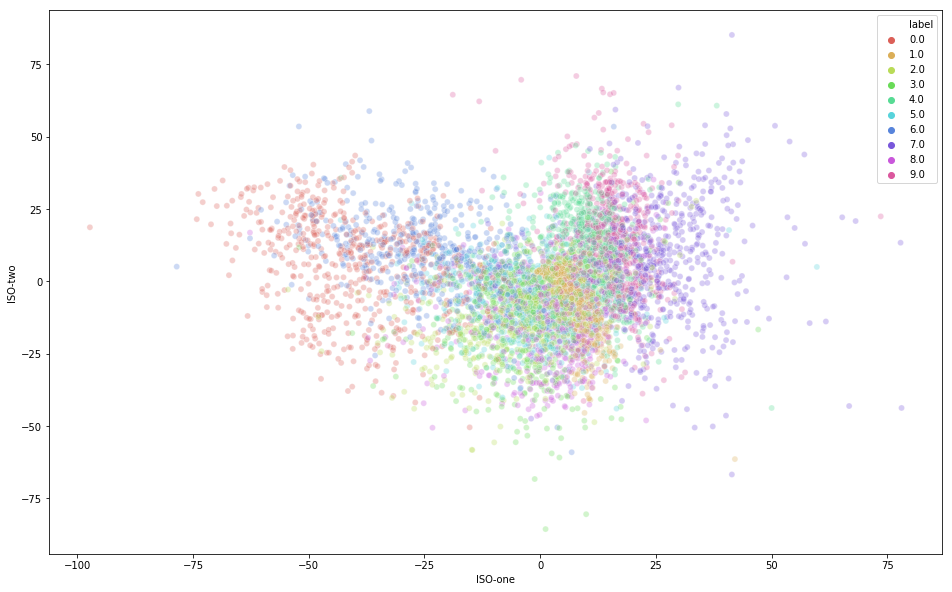

In [160]:
df_subset_train['ISO-one'] = X_iso[:,0]
df_subset_train['ISO-two'] = X_iso[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ISO-one", y="ISO-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

## Locally Linear Embedding

### Standard

In [161]:
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
X_lle = clf.fit_transform(X_train_reduced)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)

Computing LLE embedding
Done. Reconstruction error: 1.31943e-07


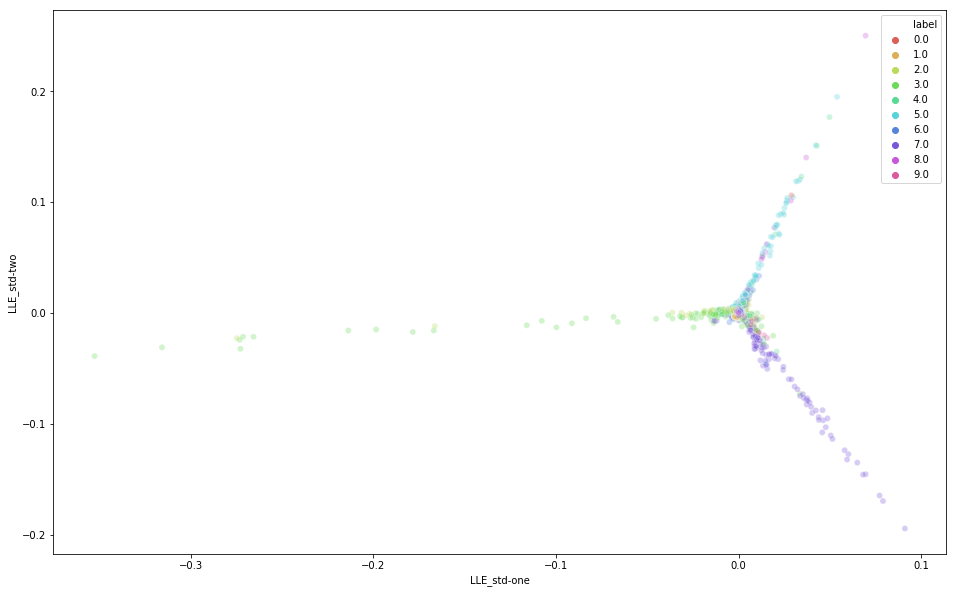

In [163]:
df_subset_train['LLE_std-one'] = X_lle[:,0]
df_subset_train['LLE_std-two'] = X_lle[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="LLE_std-one", y="LLE_std-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

### Modified

In [164]:
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X_train_reduced)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)


Computing modified LLE embedding
Done. Reconstruction error: 0.321011


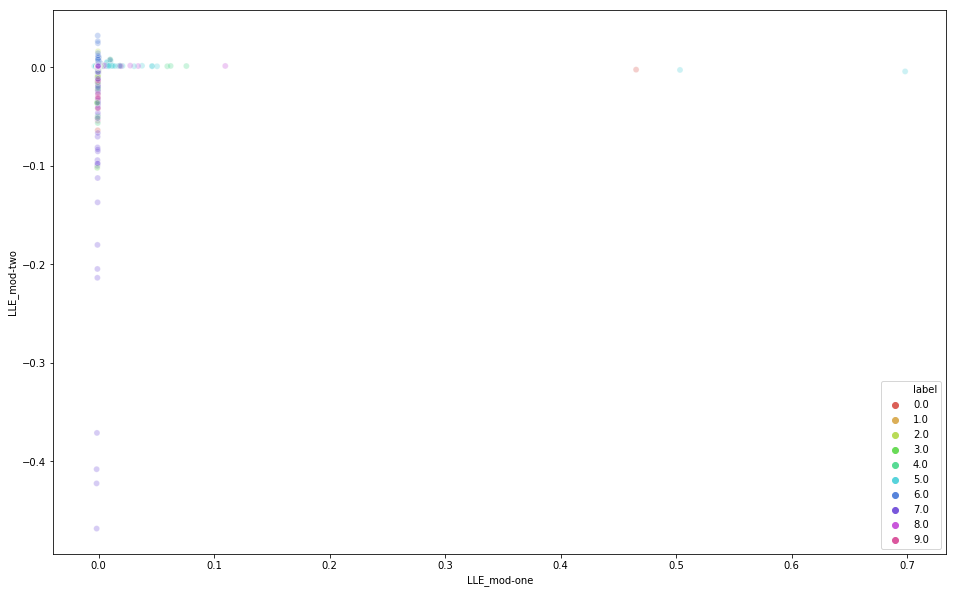

In [165]:
df_subset_train['LLE_mod-one'] = X_mlle[:,0]
df_subset_train['LLE_mod-two'] = X_mlle[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="LLE_mod-one", y="LLE_mod-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

## MDS

In [171]:
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X_train_reduced)
print("Done. Stress: %f" % clf.stress_)

Computing MDS embedding
Done. Stress: 2282902440.267520


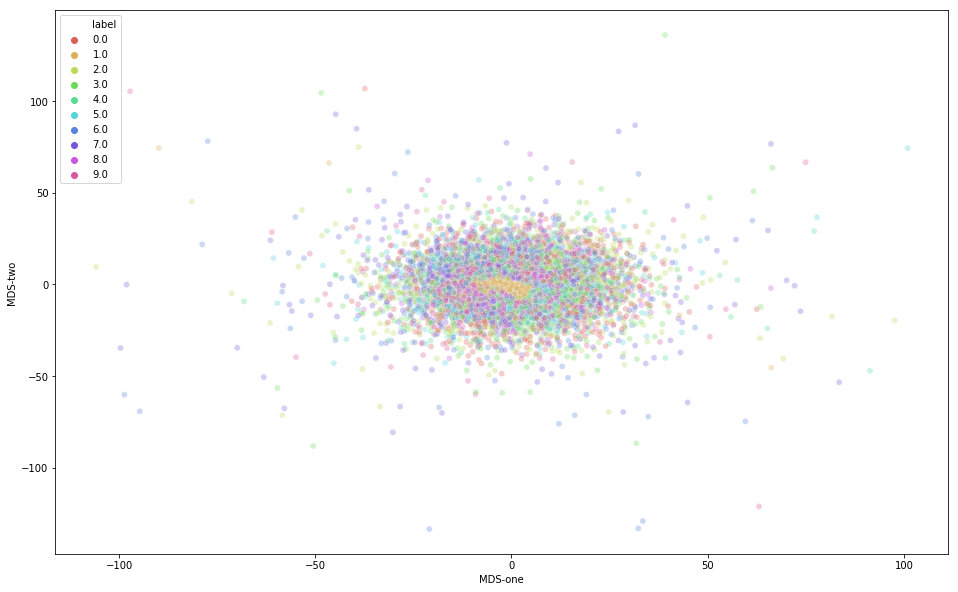

In [173]:
df_subset_train['MDS-one'] = X_mds[:,0]
df_subset_train['MDS-two'] = X_mds[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="MDS-one", y="MDS-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

## Totally Random Trees embedding

In [175]:
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)

X_transformed = hasher.fit_transform(X_train)
pca = decomposition.TruncatedSVD(n_components=2)
X_rte_reduced = pca.fit_transform(X_transformed)

Computing Totally Random Trees embedding


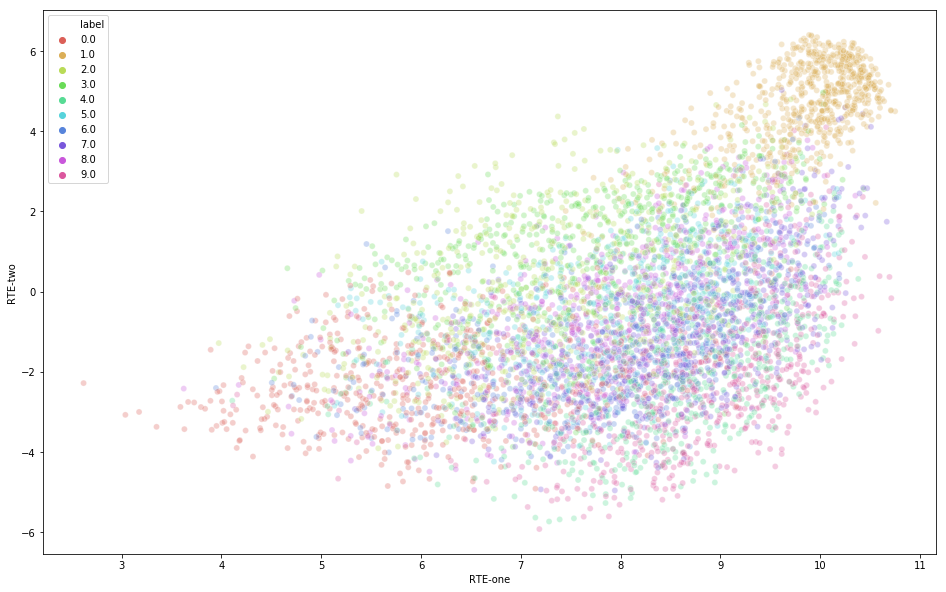

In [176]:
df_subset_train['RTE-one'] = X_rte_reduced[:,0]
df_subset_train['RTE-two'] = X_rte_reduced[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="RTE-one", y="RTE-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)

## Conclusion

work in progress

## Appendix